In [33]:
suppressPackageStartupMessages({

library(Seurat)
library(ggplot2)
library(readr)
library(dplyr)
library(RColorBrewer)
library(sp)
library(tidyverse)
library(cowplot)
library(gridExtra)
library(patchwork)
library(cowplot)
library(stringr)
library(pheatmap)
library(edgeR)
library(scater)
library(SingleCellExperiment)
library(org.Mm.eg.db)
library(org.Hs.eg.db)
library(EnhancedVolcano)
library(statmod)
})

source("SpaMTP_functions.r")

In [34]:
T1_seurat_annotated <-readRDS(file = "/QRISdata/Q1851/Andrew_C/Metabolomics/SpaMTP/T1_seurat_Annotated.RDS")
C1_seurat_annotated <-readRDS( file = "/QRISdata/Q1851/Andrew_C/Metabolomics/SpaMTP/C1_seurat_Annotated.RDS")
T2_seurat_annotated <-readRDS(  file = "/QRISdata/Q1851/Andrew_C/Metabolomics/SpaMTP/T2_seurat_Annotated.RDS")
C2_seurat_annotated <-readRDS(  file = "/QRISdata/Q1851/Andrew_C/Metabolomics/SpaMTP/C2_seurat_Annotated.RDS")

In [35]:
T1_seurat_annotated@meta.data$treatment <- "Treated"
C1_seurat_annotated@meta.data$treatment <- "Control"
T2_seurat_annotated@meta.data$treatment <- "Treated"
C2_seurat_annotated@meta.data$treatment <- "Control"

In [36]:
test1 <- getRefinedAnnotations(T1_seurat_annotated, n = 2)

Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Seurat objects”


In [25]:
all_data <- JoinLayers(merge(T1_seurat_annotated, y=list(C1_seurat_annotated,T2_seurat_annotated,C2_seurat_annotated), merge.data = TRUE))

Warning message:
“Key ‘Spatial_’ taken, using ‘fov2_’ instead”
Warning message:
“Key ‘Spatial_’ taken, using ‘fov3_’ instead”
Warning message:
“Key ‘Spatial_’ taken, using ‘fov4_’ instead”


In [26]:
Idents(all_data) <- "ssc"
tumour <- subset(all_data, idents = "3")

Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Seurat objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Seurat objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Seurat objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not v

In [27]:
tumour_refined <- getRefinedAnnotations(tumour, n = 1)

Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Seurat objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Seurat objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Seurat objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not v

In [29]:
tumour_DEPs <- FindAllDEPs(tumour_refined, "treatment", n = 3, logFC_threshold = 1.2, run_name = "FindAllDEPs", annotations = TRUE)

Pooling one sample into 3 replicates...



[1] "Running edgeR DE Analysis for  FindAllDEPs  -> with samples [ vlp94c_dhb_tissue region, vlp94a_dhb_tisue region, vlp94d_dhb_tissue region, vlp94b_dhb_tissue region ]"
[1] "Starting condition: Treated"
[1] "Starting condition: Control"


[1] "Generating Heatmap ......."


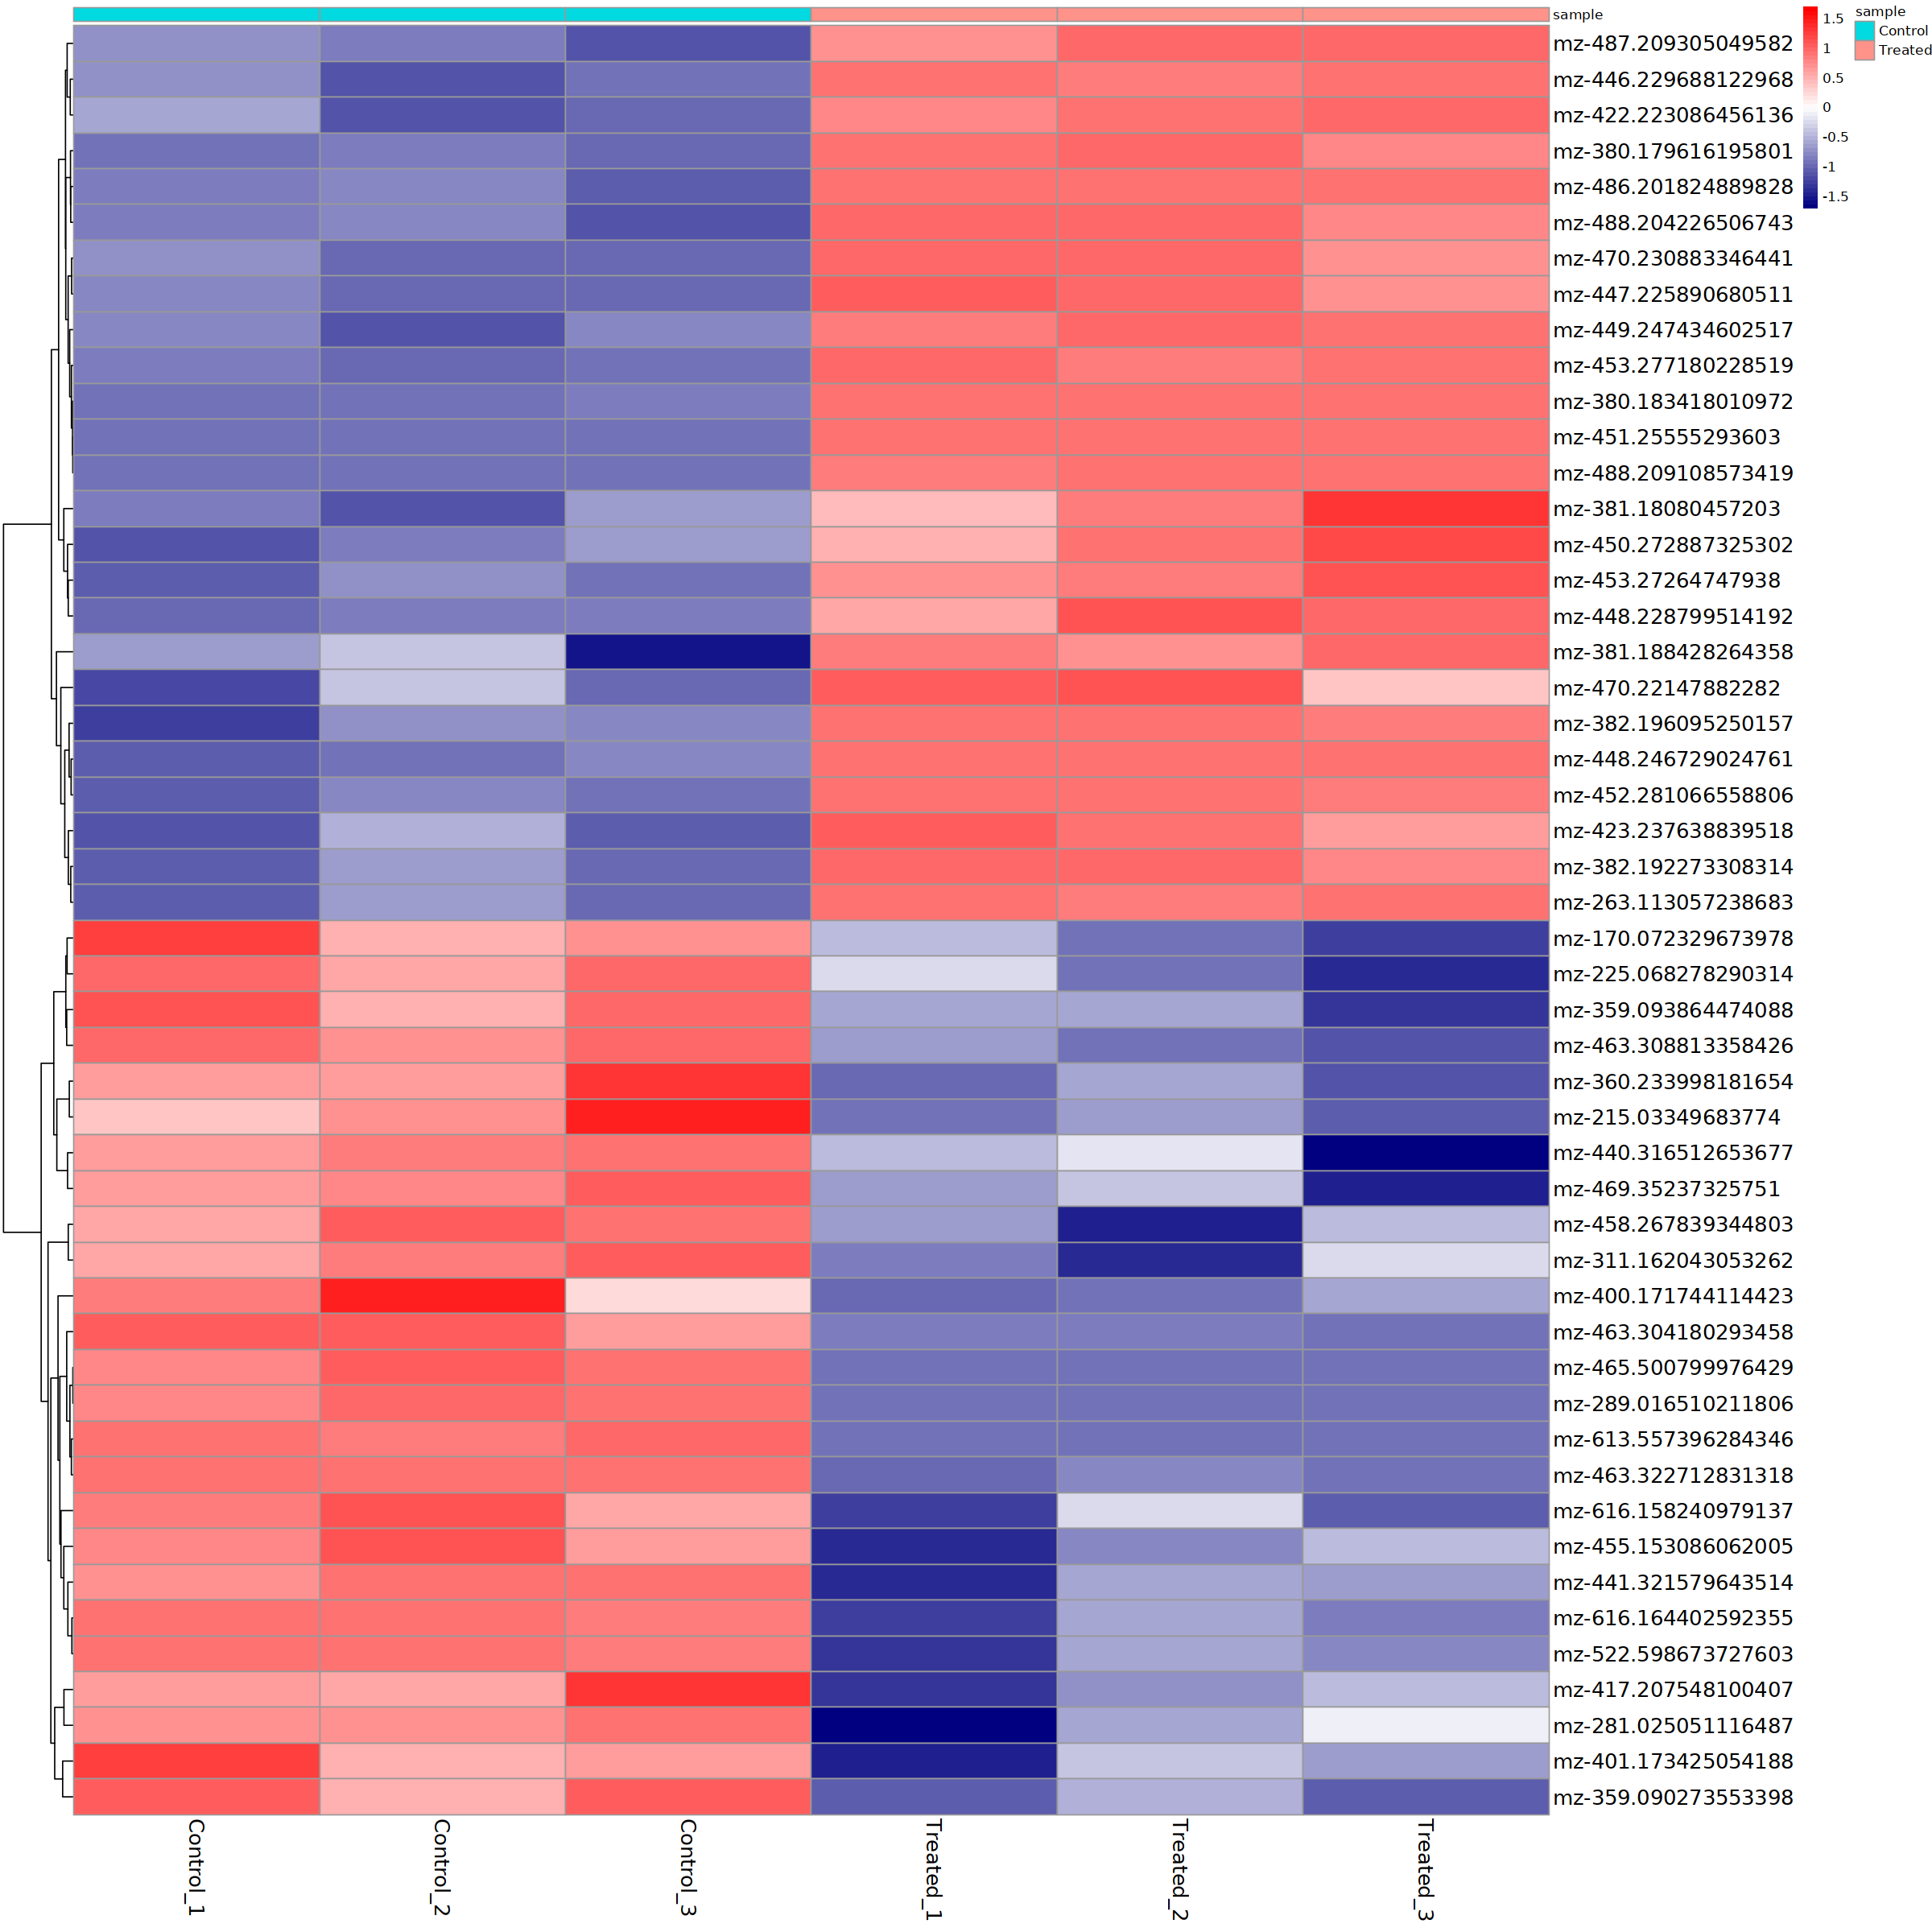

In [30]:
options(repr.plot.width = 20, repr.plot.height = 20)

DEPsHeatmap(edgeR_output = tumour_DEPs$Treated, plot_annotations = FALSE)

In [ ]:
x <- FindAllDEPs(tumour, "treatment", n = 3, logFC_threshold = 1.2, DE_output_dir = "/QRISdata/Q1851/Andrew_C/Metabolomics/DE/test3/", run_name = "FindAllDEPs", annotations = TRUE)

In [ ]:
DEPsHeatmap(edgeR_output = x$Treated)

In [ ]:
y <- FindAllDEPs(test1, "ssc", n = 3, logFC_threshold = 1.2, DE_output_dir = NULL, run_name = "FindAllDEPs", annotations = TRUE)

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 20)

DEPsHeatmap(edgeR_output = y[[6]])

In [ ]:
DEPsHeatmap(edgeR_output = y[[6]], plot_annotations = TRUE)

Warning message:
“No layers found matching search pattern provided”
Warning message in FetchData.Assay5(object = object[[DefaultAssay(object = object)]], :
“data layer is not found and counts layer is used”


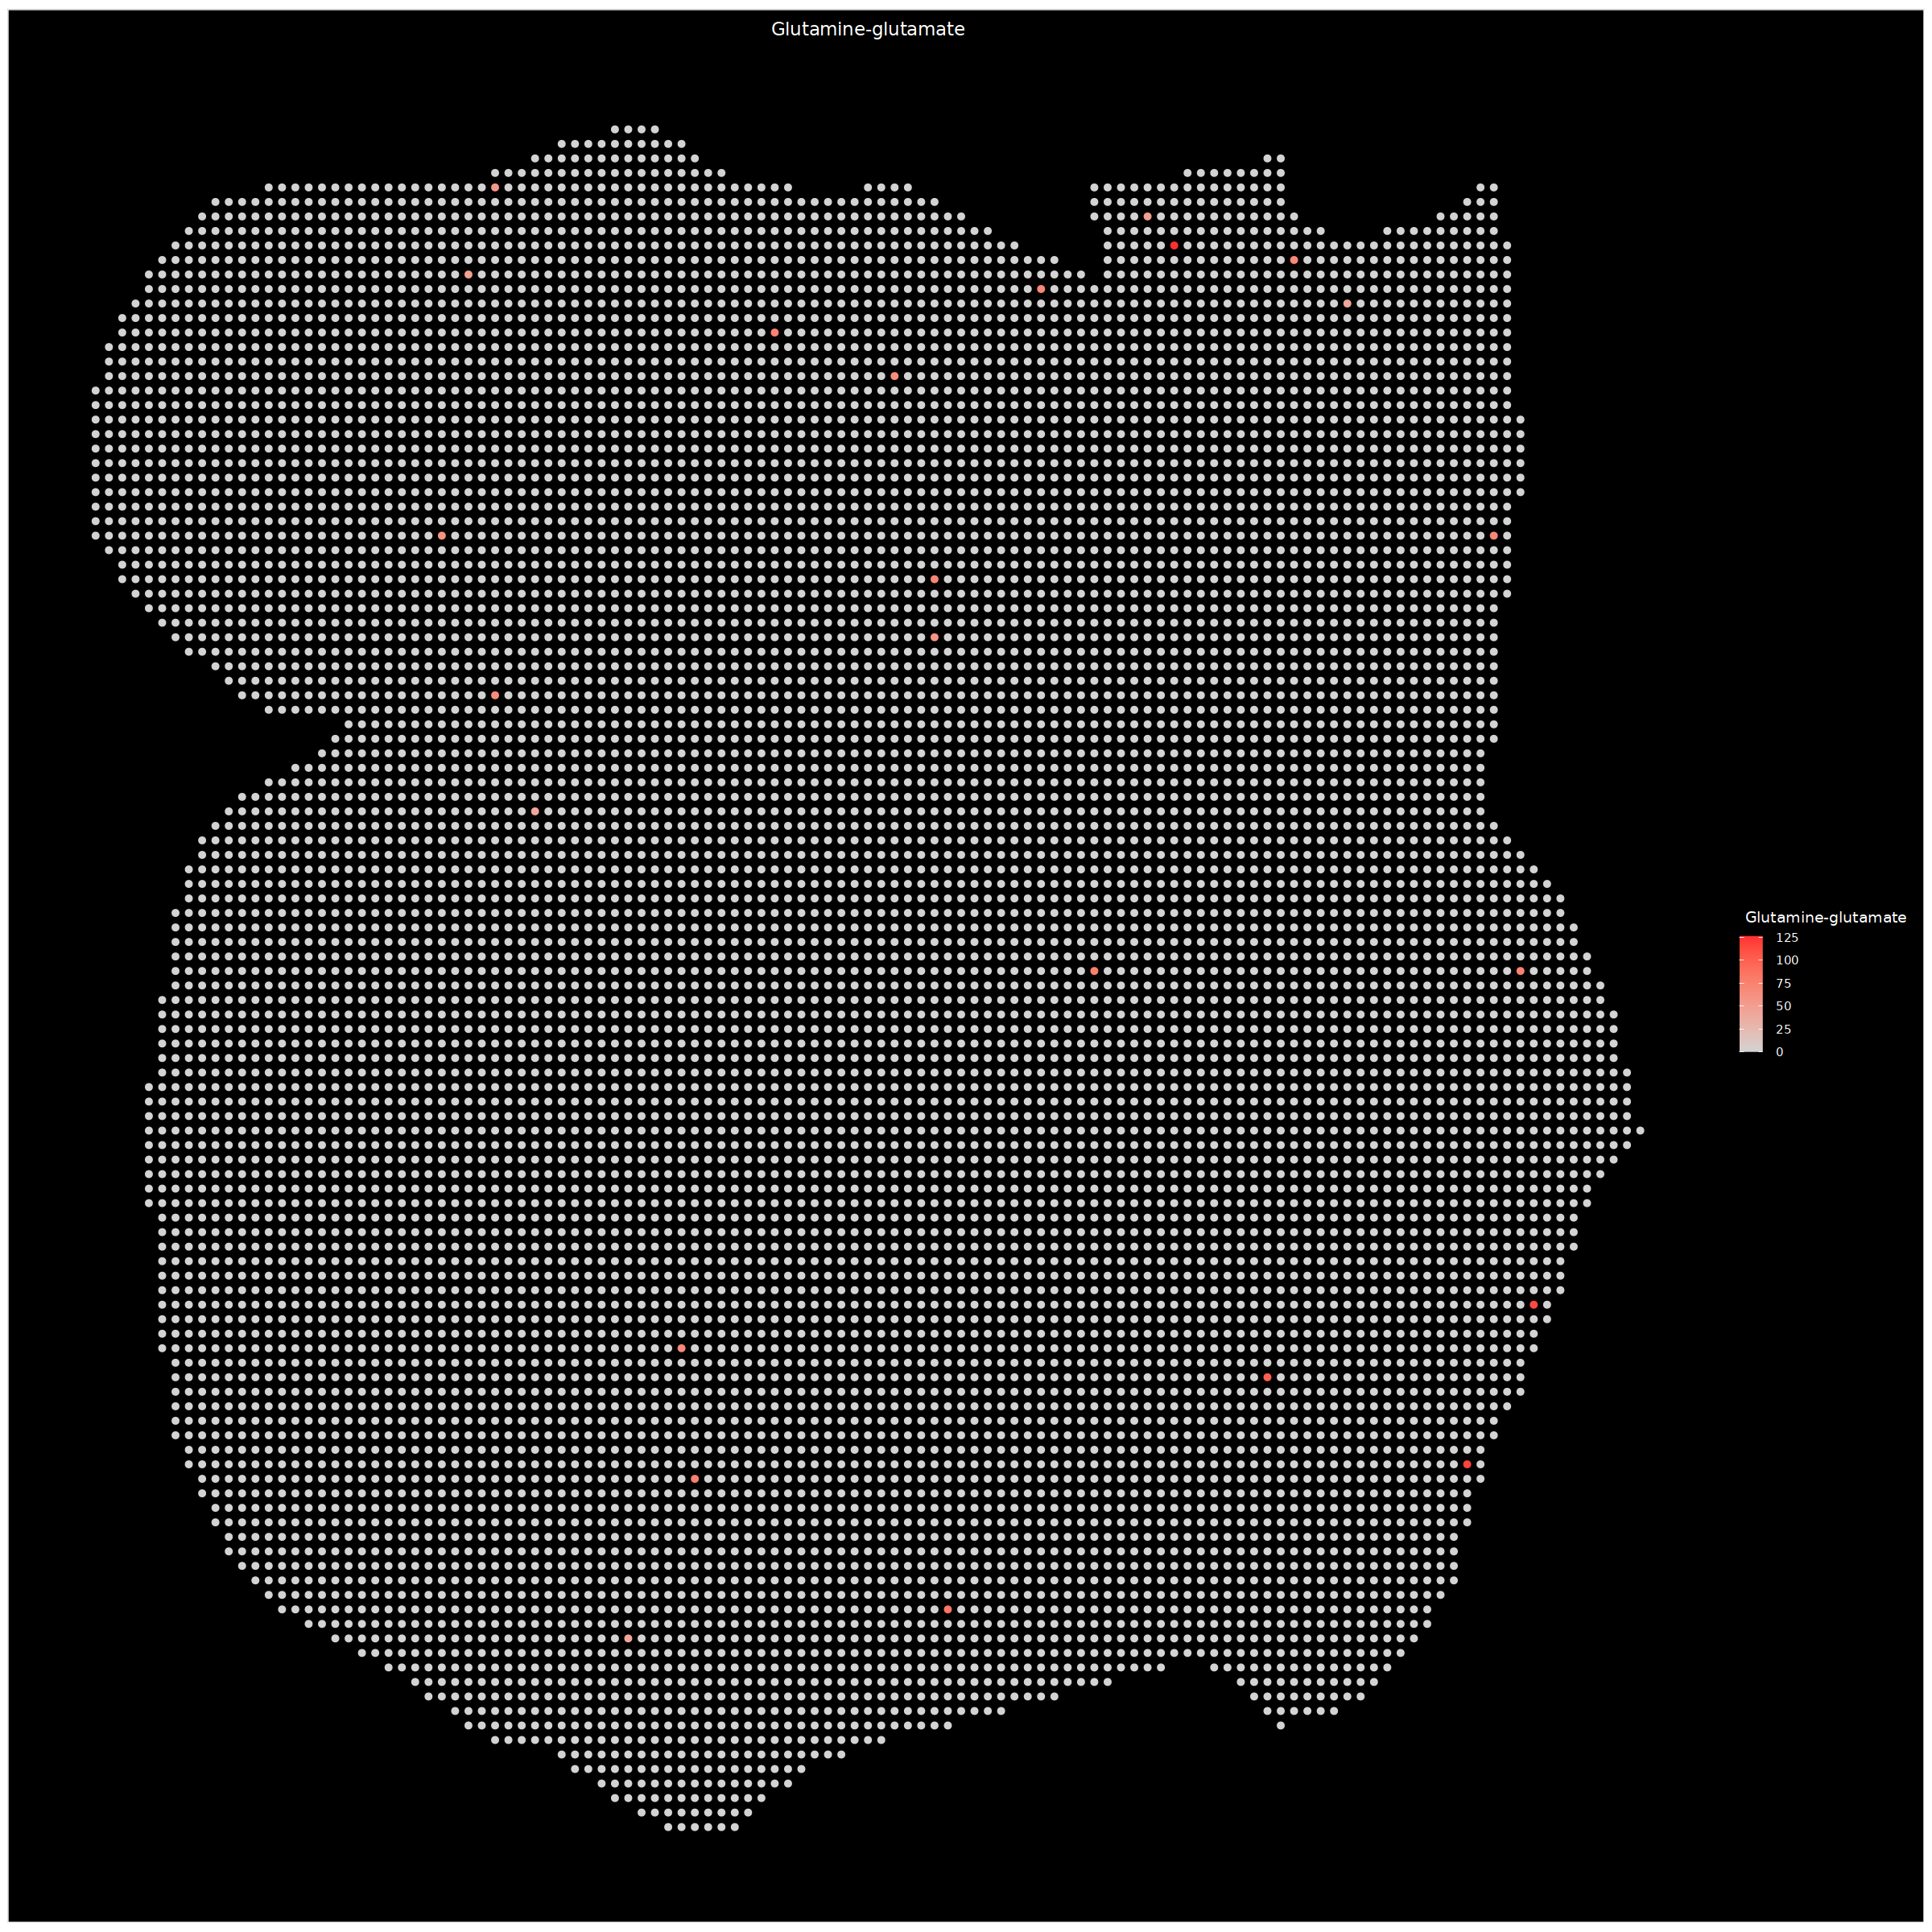

In [32]:
ImageMZAnnotationPlot(T1_seurat_annotated, fov = "fov",   metabolites =  c("Glutamine-glutamate"), size = 2.5, axes = FALSE, border.color = "grey", dark.background = TRUE)

In [31]:
SearchAnnotations(data = T1_seurat_annotated, metabolite = "Glutamine")

,raw_mz,mz_names,observed_mz,all_IsomerNames,all_Isomers
,<dbl>,<chr>,<chr>,<chr>,<chr>
1902,163.0707,mz-163.070694477615,163.070694477615,Serylglycine; Glutamine hydroxamate; O-Glycylserine; (2S)-2-Amino-5-aminooxy-5-oxopentanoic acid; Glycyl-Serine; L-4-Hydroxyglutamine,HMDB0029039; HMDB0252810; HMDB0255858; HMDB0258143; HMDB0028850; HMDB0029424
24344,204.0987,mz-204.098723444433,204.098723444433,(S)-Norfenfluramine; Alanylasparagine; Asparaginylalanine; Glutaminylglycine; Glycyl-Glutamine; Glycyl-Gamma-glutamate,HMDB0243739; HMDB0028682; HMDB0028724; HMDB0028797; HMDB0028839; HMDB0028855
30985,218.1131,mz-218.113117371217,218.113117371217,Alanylglutamine; Glutaminylalanine; Alanyl-Gamma-glutamate; 2-(2-Aminopropanylamino)-4-carbamoylbutyric acid,HMDB0028685; HMDB0028790; HMDB0028701; HMDB0248109
37620,233.0758,mz-233.075821603822,233.075821603822,Glutamine pyruvate; Kifunensine; (2S)-5-Amino-2-[(2-carboxy-2-oxoethyl)amino]-5-oxopentanoic acid,HMDB0252812; HMDB0253800; HMDB0257975
37636,233.1131,mz-233.113116718809,233.113116718809,gamma-Glutamyl-2-aminobutyric acid; gamma-Aminobutyric acid glutamate; N2-Succinyl-L-ornithine; 4-(Glutamylamino) butanoate; Aspartyl-Valine; Hydroxyprolyl-Threonine; L-N-(3-Carboxypropyl)glutamine,HMDB0240645; HMDB0252609; HMDB0001199; HMDB0012161; HMDB0028766; HMDB0028873; HMDB0029393
38062,234.1083,mz-234.108296824659,234.108296824659,Glutaminylserine; Serylglutamine; Asparaginyl-Threonine; Serinyl-Gamma-glutamate,HMDB0028806; HMDB0029037; HMDB0028741; HMDB0029053
38482,235.0936,mz-235.09361940032,235.09361940032,Glutamylserine; Serylglutamic acid; gamma-Glutamylserine; N-(Carboxymethyl)-N-(2-((carboxymethyl)amino)ethyl)glycine; Glutamine lactate; Tris(carboxymethyl)ethylenediamine; L-beta-aspartyl-L-threonine; Aspartyl-Threonine; Threoninyl-Aspartate,HMDB0028828; HMDB0029038; HMDB0029158; HMDB0247201; HMDB0252811; HMDB0257993; HMDB0011169; HMDB0028763; HMDB0304789
42253,244.1283,mz-244.128277654571,244.128277654571,Glutaminylproline; Prolyl-Glutamine; Prolyl-Gamma-glutamate,HMDB0028805; HMDB0029015; HMDB0029031
42670,245.1484,mz-245.148418086945,245.148418086945,"Hexanoylglutamine; (2R,4S)-1-Tert-Butyl 2-methyl 4-aminopyrrolidine-1,2-dicarboxylate; Hydroxyprolyl-Isoleucine; Hydroxyprolyl-Leucine",HMDB0242182; HMDB0242584; HMDB0028866; HMDB0028867


In [1]:
T1_seurat_annotated

ERROR: Error in eval(expr, envir, enclos): object 'T1_seurat_annotated' not found
